In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(3, name="q")
crz, crx, cres = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx"), ClassicalRegister(1, name="cres")
circuit = QuantumCircuit(qr, crz, crx, cres)

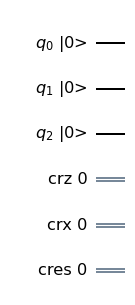

In [3]:
%matplotlib inline
circuit.draw(initial_state = True, output = 'mpl')

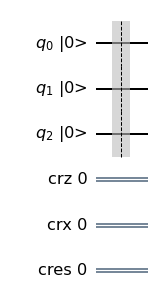

In [4]:
# circuit.x(0)
circuit.h(0)
circuit.barrier()
circuit.draw(initial_state = True, output = 'mpl')

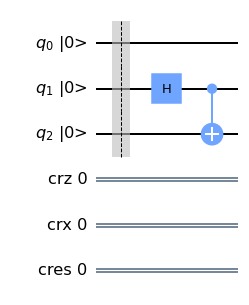

In [5]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(initial_state = True, output = 'mpl')

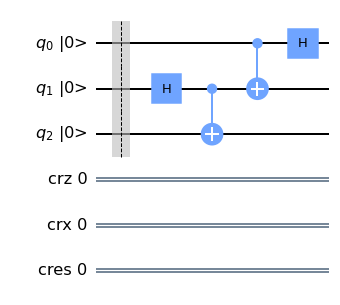

In [6]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(initial_state = True, output = 'mpl')

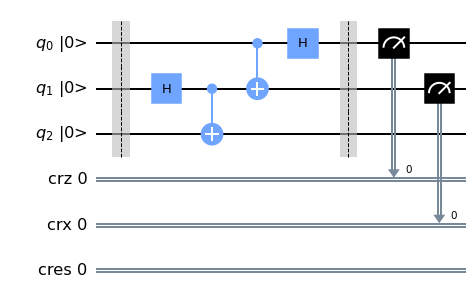

In [7]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(initial_state = True, output = 'mpl')

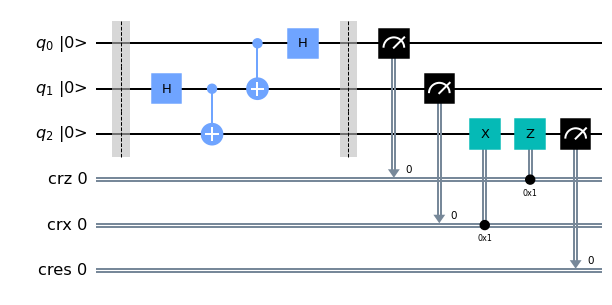

In [8]:
circuit.x(2).c_if(crx, 1) # Apply gates if the registers 
circuit.z(2).c_if(crz, 1) # are in the state '1'
circuit.measure(2,2)
circuit.draw(initial_state = True, output = 'mpl')

In [9]:
# # cz is the Controlled-Z Gate which works as follows
# # if control qubit == 0  --> do nothing
# # if control qubit == 0  --> negate (multiply by -1) the target qubit
# circuit.barrier()
# circuit.cx(1, 2)
# circuit.cz(0, 2)
# circuit.measure(2, 2)
# circuit.draw(initial_state = True, output = 'mpl')

{'0 1 1': 268, '0 0 1': 246, '0 0 0': 249, '0 1 0': 261}


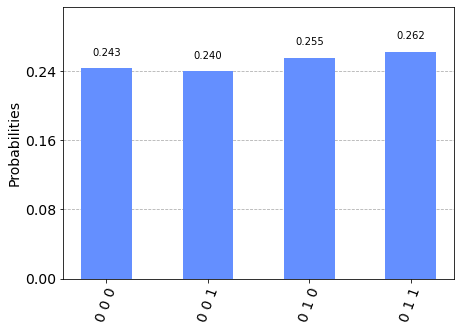

In [10]:
# Note that all final classical bits start with "1" which means q0 succesfully teleported
# its value of 1 onto q2
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
print(counts) # counts out of 1024 shots
plot_histogram(counts)